In [16]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical

In [17]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

train_images, test_images = train_images / 255.0, test_images / 255.0

train_labels, test_labels = to_categorical(train_labels), to_categorical(test_labels)

In [18]:
model = tf.keras.Sequential([
 tf.keras.layers.Conv2D(32, 3, activation='relu', input_shape=(28, 28, 1)),
 tf.keras.layers.MaxPooling2D(),
 tf.keras.layers.Conv2D(64, 3, activation='relu'),
 tf.keras.layers.MaxPooling2D(),
 tf.keras.layers.Conv2D(64, 3, activation='relu'),
 tf.keras.layers.Flatten(),
 tf.keras.layers.Dense(64, activation='relu'),
 tf.keras.layers.Dense(10, activation='softmax')
])

In [19]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(train_images, train_labels, epochs=5, batch_size=64, validation_split=0.2)

Epoch 1/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 24s 31ms/step - accuracy: 0.8607 - loss: 0.4780 - val_accuracy: 0.9730 - val_loss: 0.0963
Epoch 2/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 41s 31ms/step - accuracy: 0.9804 - loss: 0.0629 - val_accuracy: 0.9815 - val_loss: 0.0651
Epoch 3/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 40s 30ms/step - accuracy: 0.9859 - loss: 0.0446 - val_accuracy: 0.9858 - val_loss: 0.0473
Epoch 4/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 22s 30ms/step - accuracy: 0.9902 - loss: 0.0292 - val_accuracy: 0.9883 - val_loss: 0.0409
Epoch 5/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 23s 31ms/step - accuracy: 0.9918 - loss: 0.0234 - val_accuracy: 0.9877 - val_loss: 0.0449


In [21]:
_, test_acc = model.evaluate(test_images, test_labels)
print(f"\nTest Accuracy : {round(test_acc * 100, 4)}%")


313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9868 - loss: 0.0433

Test Accuracy : 98.94%


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


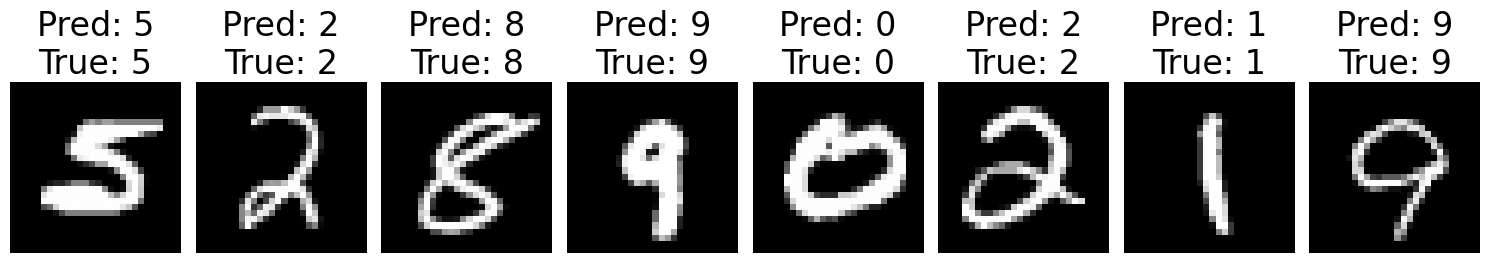

In [29]:
import matplotlib.pyplot as plt
import numpy as np

# Pick random indices for sample test images
num_samples = 8
indices = np.random.choice(len(test_images), num_samples, replace=False)

# Get the selected images and labels
sample_images = test_images[indices]
sample_labels = test_labels[indices]

# Reshape if needed (since test_images are 28x28 and model expects 28x28x1)
sample_images_reshaped = sample_images.reshape(-1, 28, 28, 1)

# Predict
predictions = model.predict(sample_images_reshaped)
predicted_labels = np.argmax(predictions, axis=1)
true_labels = np.argmax(sample_labels, axis=1)

# Plot
plt.figure(figsize=(15, 4))
for i in range(num_samples):
    plt.subplot(1, num_samples, i + 1)
    plt.imshow(sample_images[i], cmap='gray')
    plt.axis('off')
    plt.title(f"Pred: {predicted_labels[i]}\nTrue: {true_labels[i]}", fontsize=24)
plt.tight_layout()
plt.show()
